# Importing libs and reading data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Define a function to read CSV data with error handling

In [33]:
def read_data(filepath):
    try:
        return pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found. Please check the path.")
        return None

### read activity data

In [34]:
activity_data_1 = read_data("/Users/tenzinyonten/Downloads/archive/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
activity_data_2 = read_data("/Users/tenzinyonten/Downloads/archive/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")


In [35]:
if activity_data_1 is not None and activity_data_2 is not None:
    activity_data = pd.concat([activity_data_1, activity_data_2])
else:
    print("Error: Unable to read activity data. Check file paths and permissions.")
    exit()


### read sleep data

In [36]:
sleep_data = pd.read_csv(r"/Users/tenzinyonten/Downloads/archive/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [37]:
if sleep_data is None:
    print("Error: Unable to read sleep data. Check file path and permissions.")
    exit()

## Data analysis and cleaning

In [38]:
activity_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [39]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [40]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [41]:
activity_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories      

In [42]:
sleep_data["HoursSlept"] = sleep_data.loc[:,"TotalMinutesAsleep"]/60
sleep_data["TimeTakenToSleep"] = sleep_data.loc[:,"TotalTimeInBed"]-sleep_data.loc[:,"TotalMinutesAsleep"]

In [43]:
#To see if there is any duplicated entries
activity_data.duplicated(subset=["Id","ActivityDate","TotalSteps","TotalDistance"]).sum()

0

In [44]:
activity_data.Id.nunique()

35

In [45]:
activity_data.ActivityDate.nunique()

62

In [46]:
activity_data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [47]:
activity_data["ActivityDate"] = pd.to_datetime(activity_data["ActivityDate"])

In [49]:
activity_data = activity_data[['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
                               'VeryActiveDistance','ModeratelyActiveDistance', 'LightActiveDistance',
                               'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
                               'SedentaryMinutes', 'Calories']]


In [50]:
data =activity_data.rename(columns={
    "ModeratelyActiveDistance":"FairlyActiveDistance",
    "LightActiveDistance":"LightlyActiveDistance"
})

In [51]:
data["Weekday"] = data.loc[:,"ActivityDate"].dt.day_name()

In [52]:
data["TotalActiveMinutes"]=data.loc[:,"VeryActiveMinutes"]+data.loc[:,"FairlyActiveMinutes"]\
                    +data.loc[:,"LightlyActiveMinutes"]
data["TotalHours"]=round((data.loc[:,"VeryActiveMinutes"]+data.loc[:,"FairlyActiveMinutes"]\
                    +data.loc[:,"LightlyActiveMinutes"]+data.loc[:,"SedentaryMinutes"])/60).astype(int)

## Exploratory data analysis

Text(0, 0.5, 'Frequency')

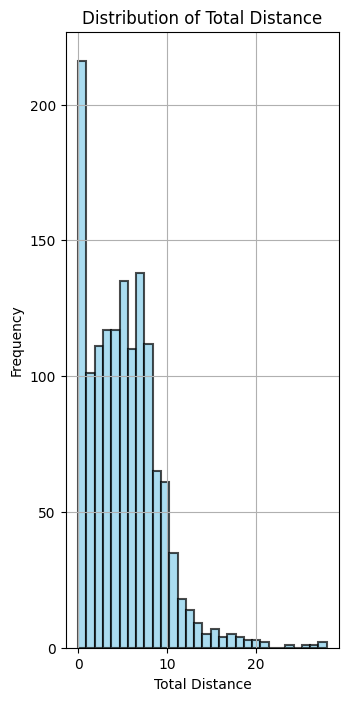

In [53]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
activity_data["TotalDistance"].hist(bins=30, color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.title("Distribution of Total Distance")
plt.xlabel("Total Distance")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

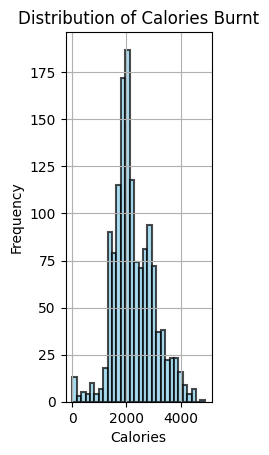

In [58]:
plt.subplot(1, 3, 2)
activity_data["Calories"].hist(bins=30, color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.title("Distribution of Calories Burnt")
plt.xlabel("Calories")
plt.ylabel("Frequency")

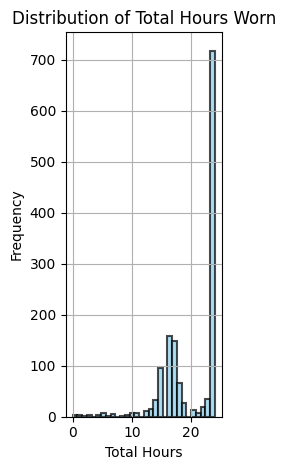

In [63]:
plt.subplot(1, 3, 3)
data["TotalHours"].hist(bins=30, color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.title("Distribution of Total Hours Worn")
plt.xlabel("Total Hours")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [54]:
data.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,FairlyActiveDistance,LightlyActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,TotalHours
count,1.397000e+03,1397,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,4.781210e+09,2016-04-19 01:26:35.132426496,7280.898354,5.219434,1.397416,0.538461,3.193407,19.679313,13.403006,185.372942,992.542591,2266.265569,218.455261,20.184681
min,1.503960e+09,2016-03-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-09 00:00:00,3146.000000,2.170000,0.000000,0.000000,1.610000,0.000000,0.000000,111.000000,729.000000,1799.000000,125.000000,16.000000
50%,4.445115e+09,2016-04-19 00:00:00,6999.000000,4.950000,0.100000,0.200000,3.240000,2.000000,6.000000,195.000000,1057.000000,2114.000000,242.000000,24.000000
75%,6.962181e+09,2016-04-30 00:00:00,10544.000000,7.500000,1.830000,0.770000,4.690000,30.000000,18.000000,262.000000,1244.000000,2770.000000,313.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,21.920000,6.480000,12.510000,210.000000,660.000000,720.000000,1440.000000,4900.000000,720.000000,24.000000
std,2.384293e+09,NaN,5214.336113,3.994206,2.607480,0.867436,2.116869,31.675878,26.401247,114.058601,313.297376,753.005527,128.748674,4.674839


In [64]:
sleep_data.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,HoursSlept,TimeTakenToSleep
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225,6.991122,39.171913
std,2.060360e+09,0.345521,118.344679,127.101607,1.972411,46.570095
min,1.503960e+09,1.000000,58.000000,61.000000,0.966667,0.000000
25%,3.977334e+09,1.000000,361.000000,403.000000,6.016667,17.000000
50%,4.702922e+09,1.000000,433.000000,463.000000,7.216667,25.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,8.166667,40.000000
max,8.792010e+09,3.000000,796.000000,961.000000,13.266667,371.000000


In [67]:
data_corr = data[['TotalSteps', 'TotalDistance',
       'VeryActiveDistance', 'FairlyActiveDistance', 'LightlyActiveDistance', 
        'VeryActiveMinutes','FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalHours',"TotalActiveMinutes"]].corr()


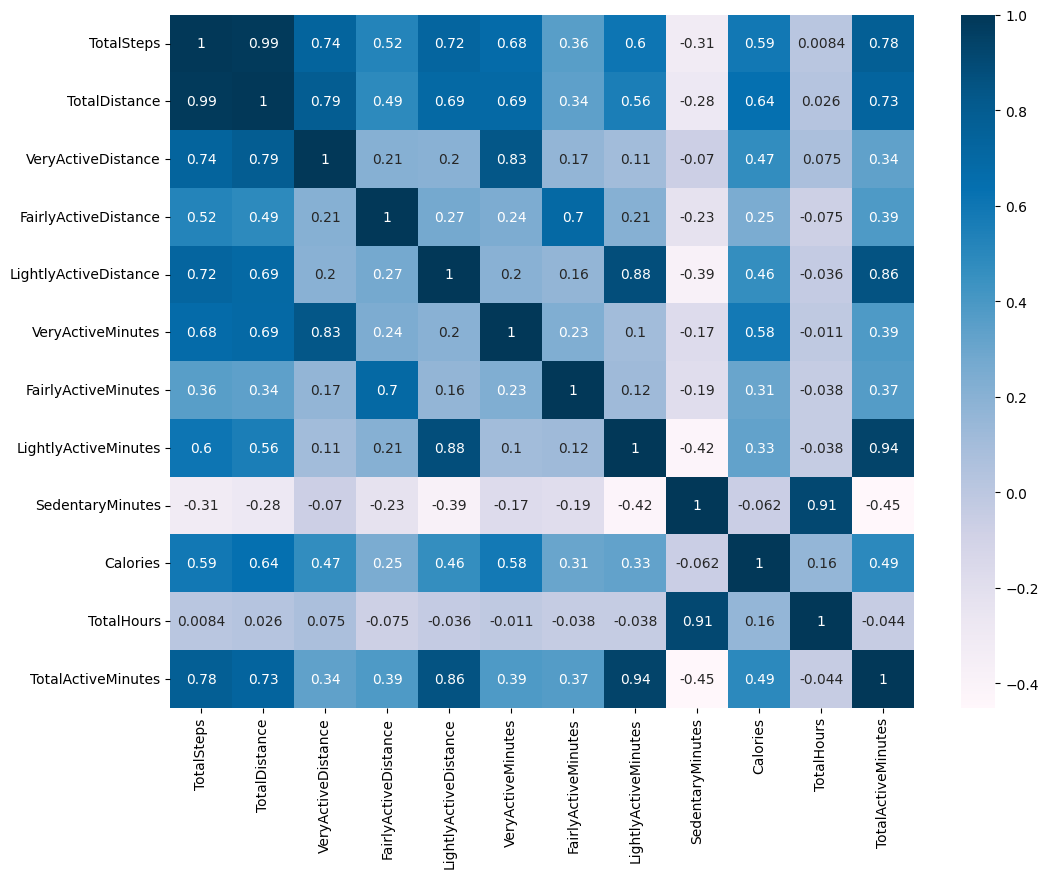

In [68]:
plt.figure(figsize=(12,9))
sns.heatmap(data_corr,annot=True,cmap="PuBu")
plt.show()

## From our simple analysis and understanding of the data above we see a few things such as:
* The average step count is 7280
* The average calories burnt is 2266
* Most people use their watch around 20 hours aday
* The average time taken to sleep while in bed is 40 minutes which is kinda high
* The total steps,very active minutes and Total Distance had the hight correlation with calories

# Calories vs Total Steps with Active Minutes

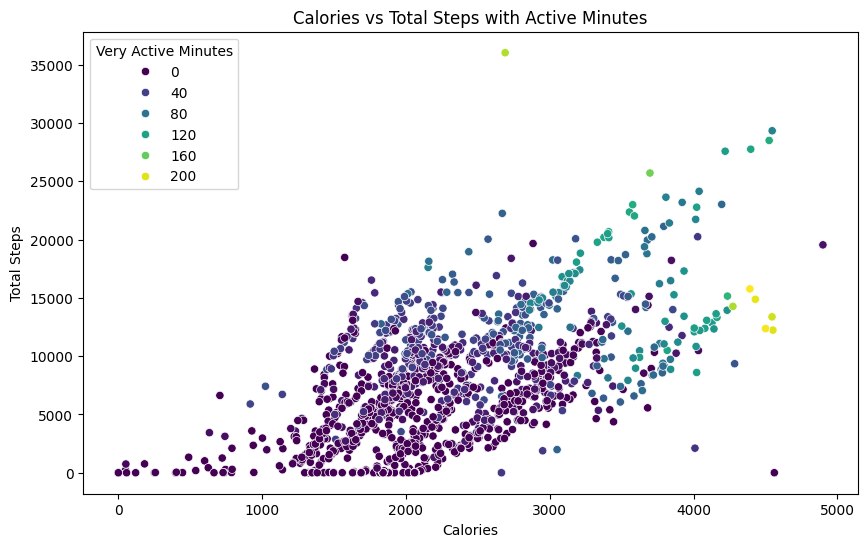

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Calories", y="TotalSteps", hue="VeryActiveMinutes", data=activity_data, palette="viridis")
plt.title("Calories vs Total Steps with Active Minutes")
plt.xlabel("Calories")
plt.ylabel("Total Steps")
plt.legend(title="Very Active Minutes")
plt.show()

# Watch Usage by Activity Type

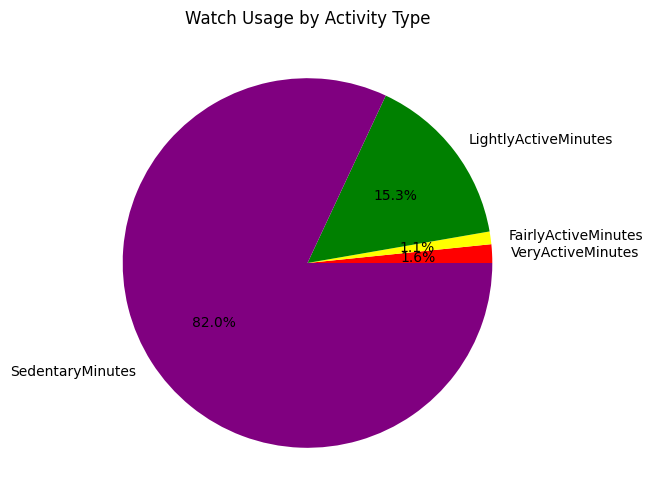

In [72]:
activity_minutes = activity_data[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]].sum()
plt.figure(figsize=(10, 6))
plt.pie(activity_minutes, labels=activity_minutes.index, autopct='%1.1f%%', colors=["red", "yellow", "green", "purple"])
plt.title("Watch Usage by Activity Type")
plt.show()


# Which weekday had the most activity?

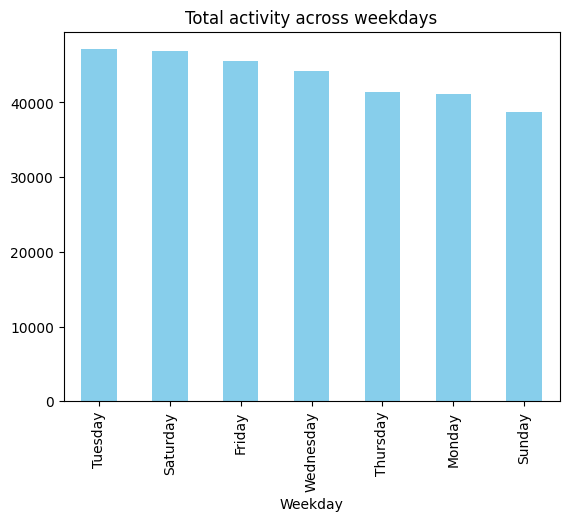

In [77]:
data.groupby("Weekday")["TotalActiveMinutes"].sum().sort_values(ascending=False).plot(kind = "bar",color = "skyblue")
plt.title("Total activity across weekdays")
plt.show()

* Here we can see that Tuesday had the most activity followed by saturday then Friday had the highest activity

# What are people mostly using their watch for?

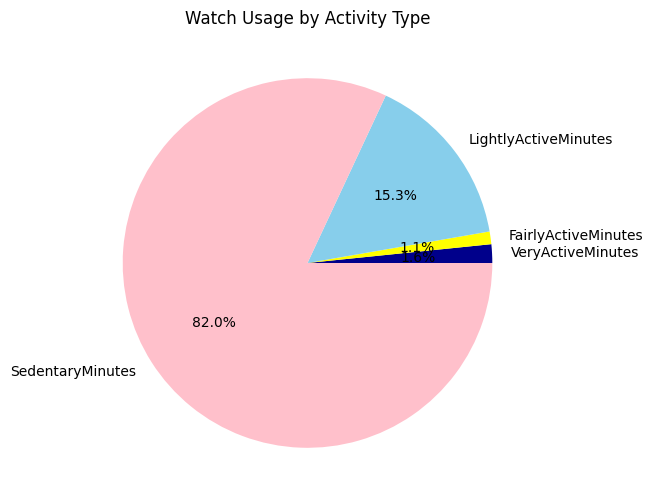

In [80]:
activity_minutes = activity_data[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]].sum()
plt.figure(figsize=(10, 6))
plt.pie(activity_minutes, labels=activity_minutes.index, autopct='%1.1f%%', colors=["darkblue", "yellow", "skyblue", "pink"])
plt.title("Watch Usage by Activity Type")
plt.show()

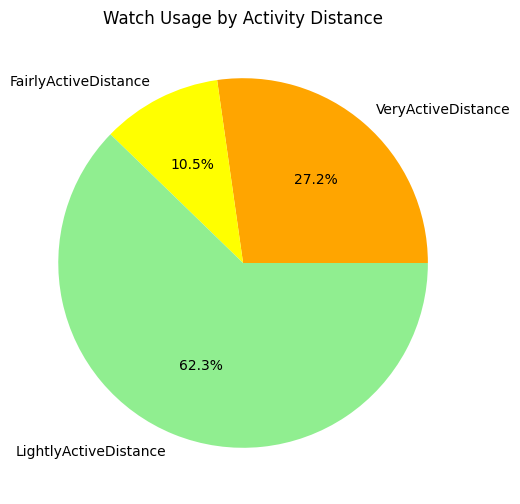

In [85]:
activity_distance = data.loc[:,["VeryActiveDistance","FairlyActiveDistance","LightlyActiveDistance"]].sum()
plt.figure(figsize=(10, 6))
plt.pie(activity_distance, labels=activity_distance.index, autopct='%1.1f%%', colors=["orange", "yellow", "lightgreen"])
plt.title("Watch Usage by Activity Distance")
plt.show()

*From the 2 pie charts above we can see that most of the people are using the watch for normal activies with low high
activity time and distance

# Average sleep time across the sample

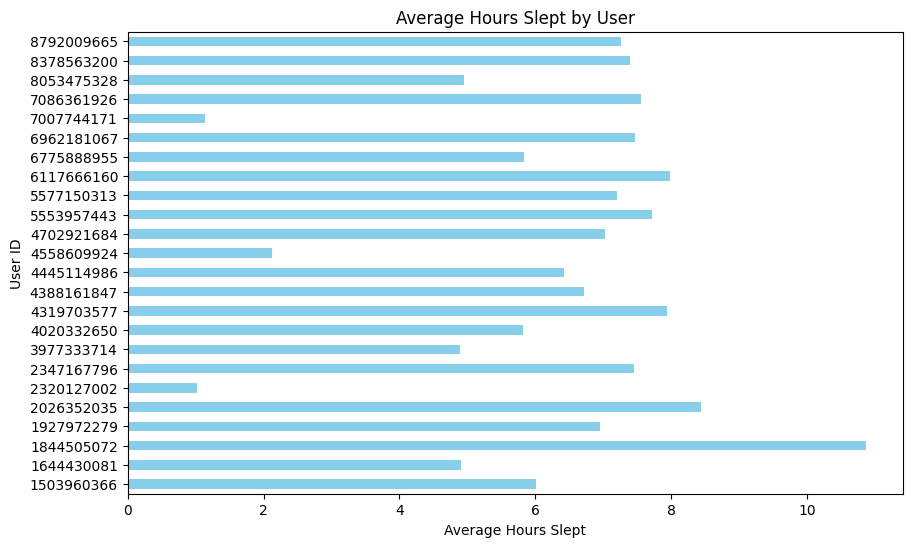

In [86]:
plt.figure(figsize=(10, 6))
sleep_data.groupby("Id")["HoursSlept"].mean().plot(kind="barh", color="skyblue")
plt.title("Average Hours Slept by User")
plt.xlabel("Average Hours Slept")
plt.ylabel("User ID")
plt.show()

* Here we can see that most of the sample sleep less than 8 hours

# Conclusion

*The analysis reveals interesting insights into user activity and sleep patterns.*
*There is a strong positive correlation between total steps, active minutes, and calories burnt.*
*People tend to be most active from Friday to Tuesday, with Tuesday being the most active day.*
*A significant portion of watch usage is for light activities, followed by sedentary time.*
*The average sleep duration is around 7 hours, with some individuals sleeping less.*
*To promote better health and activity levels, personalized notifications can be sent to encourage more activity on less active days and improve sleep hygiene.*
